In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load Data

netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Describe Data

netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Show Type Count in Netflix Dataset')

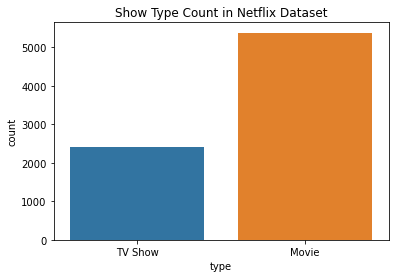

In [5]:
sns.countplot("type", data=netflix)
plt.title("Show Type Count in Netflix Dataset")

In [6]:
# Kids Content

kids_movies = netflix['listed_in'].str.contains('Children & Family Movies', case=False, regex=False)
kids_tv_shows = netflix['listed_in'].str.contains("Kids' TV", case=False, regex=False)
kids = netflix[kids_movies | kids_tv_shows]
kids.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",2019,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a..."
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",2018,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...
113,s114,Movie,48 Christmas Wishes,"Marco Deufemia, Justin G. Dyck","Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara K...",Canada,"December 20, 2017",2017,TV-G,84 min,"Children & Family Movies, Comedies",When a small town's letters to Santa accidenta...
145,s146,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,"July 1, 2017",2011,PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...
147,s148,Movie,A Babysitter's Guide to Monster Hunting,Rachel Talalay,"Tamara Smart, Oona Laurence, Tom Felton, Troy ...",United States,"October 15, 2020",2020,TV-PG,99 min,Children & Family Movies,"Recruited by a secret society of babysitters, ..."


Movie      532
TV Show    414
Name: type, dtype: int64

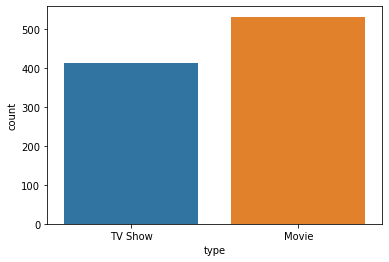

In [7]:
plot = sns.countplot(x="type", data=kids)
kids["type"].value_counts()

In [8]:
# Visualization for stand-up comedies

netflix.listed_in.unique()
stand_up_filter = netflix['listed_in'].str.contains("Stand-Up Comedy", case=False, regex=False)
print(f"Stand_up_filter: {type(stand_up_filter)}\n{stand_up_filter}")

Stand_up_filter: <class 'pandas.core.series.Series'>
0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: listed_in, Length: 7787, dtype: bool


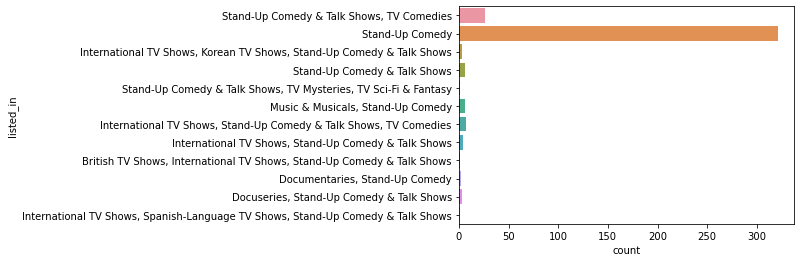

In [9]:
stand_up = netflix[stand_up_filter]
i = sns.countplot(y="listed_in", data=stand_up);

Text(0.5, 1.0, 'Rating Count in Netflix')

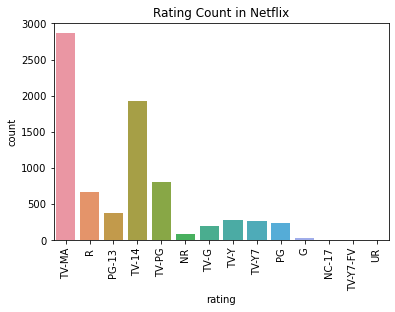

In [10]:
# Working with rating column

sns.countplot(netflix["rating"])
plt.xticks(rotation=90)
plt.title("Rating Count in Netflix")